## Introduction

We have learned AES on lectures. This assignment aims to develop its practical applications and analyze security.
You will face two kinds of questions: short-answer questions and implementation questions. They always start with a red <font color="red">Question xx</font>. There are <b>14 Questions</b> in total.

For short answer questions, please type your answer in the next block (by double click that block).

For implementation questions, please finish the corresponding implementation by typing your code between the comments <font color="green">"You code starts"</font> and <font color="green">"You code ends"</font>. Please read the requiremnts carefully for each question. Unable to follow them will attract 0 marks for corresponding questions.

The total marks for this assignment is 130, contributing as 13% to the subject marks.

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. <b> You should use Python 3</b>. Our marking script is running at Python 3.10.16.

<font color="red">Important: Importing any library is prohibited! Using any of them will attract 0 mark for all corresponding questions!</font>

<b>Academic misconduct</b>: For most people, collaboration will form a natural part of the undertaking of this homework, and we encourage you to discuss it in general terms with other students. However, this ultimately is still an individual task, and so reuse of code or other instances of clear influence will be considered cheating. We will be checking submissions for originality and will invoke the University’s Academic Misconduct policy where inappropriate levels of collusion or plagiarism are deemed to have taken place.

---------------------------------------------------------

<font color="green">Please sign your student name and ID there.</font>

By signing my name there, I agree:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.


Student Name: Aaryan Maheshwari

Student ID: 230022

Date: 13th June, 2025

---------------------------------------------------------

## Section 0: Preparation
#### [40 marks]
We are going to develop AES-128. Please review its mechanism from the slides and Stalling's book.

Followings are some default parameters used by AES. Please ensure you have already run them when you re-start this notebook. Do not modify it.

In [48]:
SBOX = [
    [0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
    [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0],
    [0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15],
    [0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75],
    [0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84],
    [0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF],
    [0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8],
    [0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2],
    [0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73],
    [0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB],
    [0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79],
    [0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08],
    [0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A],
    [0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E],
    [0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF],
    [0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16]
]

INV_SBOX = [
    [0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB],
    [0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB],
    [0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E],
    [0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25],
    [0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92],
    [0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84],
    [0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06],
    [0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B],
    [0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73],
    [0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E],
    [0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B],
    [0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4],
    [0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F],
    [0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF],
    [0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61],
    [0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D],
]

RCON = [
    0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1B, 0x36
]

#### Data Representations

Recall that all data stored in the computer are formatted as bytes. In this assignment, we are going to represent an n-bytes data as a 1-D hexidecimals array. For example, a 5-byte data can be represented as:

In [49]:
data = [0xff, 0x01, 0x4b, 0x22, 0x00]

0x informs the computer that it is a hexadecimal representation, and the following characters (i.e. 4b) represents the value in hexadecimal format. Note that the value for each byte is 0~255, corresponding to 0x00~0xff.

<font color="red" size="4">Question 1:</font> [6 mark]

What are the size for the master key, input block, and output block in AES-128/192/256?


**Answer:**

1. AES-128:

* Master-Key Size = 128 bits
* Input Block = 128 bits
* Output Block = 128 bits



2. AES-192:

* Master-Key Size = 192 bits

* Input Block = 128 bits

* Output Block = 128 bits

3. AES-256:

* Master-Key Size = 256 bits

* Input Block = 128 bits

* Output Block = 128 bits



Before we start our implementation, we need some help functions for basic operations.

<font color="red" size="4">Question 2:</font> [5 mark]

Recall that AES operates on a 4x4 2-D <b>column-major order</b> matrix of 16 bytes. We thus need to convert our 1-D byte array data into such a 4x4 2-D byte matrix. Now finish "to_matrix" and "to_bytes" that convert the 1-D byte array to its 2-D <b>column-major order</b> matrix and convert it back respectively.

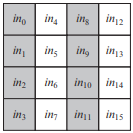

In [50]:
## Input: 1-D byte array
## Output: 2-D byte matrix
def to_matrix(data):

    matrix = [list(data[i::4]) for i in range(4)]
    return matrix

## Input: 2-D byte matrix
## Output: 1-D byte array
def to_array(matrix):

    array = [matrix[col][row] for row in range(4) for col in range(4)]
    return array

In [51]:
## For your check
test_array = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
assert len(to_matrix(test_array)) == 4
for row in to_matrix(test_array):
    assert len(row) == 4
assert to_array(to_matrix(test_array)) == test_array

<font color="red" size="4">Question 3:</font> [4 mark]

Finish the AddRoundKey operated on the 4*4 2-D matrix.

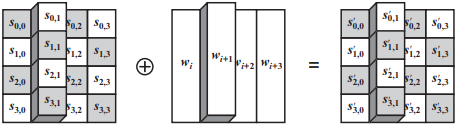

In [52]:
## Input: 2-D byte matrix input block
## Input: 2-D byte matrix key
## Output: 2-D byte matrix output block
def AddRoundKey(matrix_input, matrix_key):
    matrix_output = [[0 for i in range(4)] for i in range(4)]

    for i in range(4):
        for j in range(4):
            matrix_output[i][j] = matrix_input[i][j] ^ matrix_key[i][j]

    return matrix_output


In [53]:
## For your check
test_array_in = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
test_array_key = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
assert AddRoundKey(to_matrix(test_array_in), to_matrix(test_array_key))[2][1] == 0x00

<font color="red" size="4">Question 4:</font> [5 mark]

Finish the SubBytes and its inverse opertion operated on the 4*4 2-D matrix.

(Hint: the forward and inverse look-up tables have already been defined in Section 0 as 'SBOX' and 'INV_SBOX')

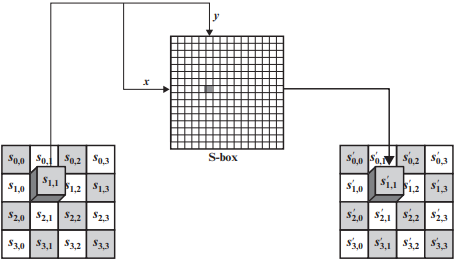

In [54]:
## Input: 2-D byte matrix
## Output: 2-D byte matrix
def SubBytes(matrix):
    for i in range(4):
        for j in range(4):
            matrix[i][j] = SBOX[matrix[i][j] >> 4][matrix[i][j] & 0x0F]
    return matrix

## Input: 2-D byte matrix
## Output: 2-D byte matrix
def SubBytes_inv(matrix):
    for i in range(4):
        for j in range(4):
            matrix[i][j] = INV_SBOX[matrix[i][j] >> 4][matrix[i][j] & 0x0F]
    return matrix

In [55]:
## For your check
test_array = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
test_matrix = to_matrix(test_array)
assert SubBytes_inv(SubBytes(test_matrix)) == test_matrix

<font color="red" size="4">Question 5:</font> [5 mark]

Finish the ShiftRows and its inverse opertion operated on the 4*4 2-D matrix.

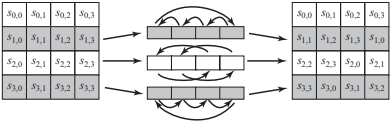

In [56]:
## Input: 2-D byte matrix
## Output: 2-D byte matrix
def ShiftRows(matrix):

    matrix[1] = matrix[1][1:] + matrix[1][:1]      # Shift 2nd row left by 1
    matrix[2] = matrix[2][2:] + matrix[2][:2]      # Shift 3rd row left by 2
    matrix[3] = matrix[3][3:] + matrix[3][:3]      # Shift 4th row left by 3

    return matrix

## Input: 2-D byte matrix
## Output: 2-D byte matrix
def ShiftRows_inv(matrix):

    matrix[1] = matrix[1][-1:] + matrix[1][:-1]    # Shift 2nd row right by 1
    matrix[2] = matrix[2][-2:] + matrix[2][:-2]    # Shift 3rd row right by 2
    matrix[3] = matrix[3][-3:] + matrix[3][:-3]    # Shift 4th row right by 3

    return matrix

In [57]:
## For your check
test_array = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
test_matrix = to_matrix(test_array)
assert ShiftRows_inv(ShiftRows(test_matrix)) == test_matrix

<font color="red" size="4">Question 6:</font> [15 mark]

Finish the MixColumns and its inverse opertion operated on the 4*4 2-D matrix.

(Hint: the individual additions and multiplications are perfromed in $GF(2^8)$ with irreducible polynomial: $x^8 + x^4 + x^3 + x + 1$ (or 0x11b in hex).)

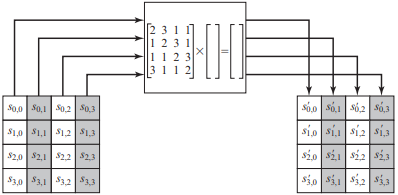

In [58]:
# multiplication by 2 in GF(2^8)
def function(a):
    return ((a << 1) ^ 0x1b) & 0xFF if (a & 0x80) else (a << 1)

# Multiplication in GF(2^8) by AES constants
def mul_2(a): return function(a)
def mul_3(a): return function(a) ^ a
def mul_9(a): return function(function(function(a))) ^ a
def mul_11(a): return function(function(function(a))) ^ function(a) ^ a
def mul_13(a): return function(function(function(a))) ^ function(function(a)) ^ a
def mul_14(a): return function(function(function(a))) ^ function(function(a)) ^ function(a)


## Input: 2-D byte matrix
## Output: 2-D byte matrix
def MixColumns(matrix):
    for i in range(4):
        a = matrix[0][i]
        b = matrix[1][i]
        c = matrix[2][i]
        d = matrix[3][i]

        matrix[0][i] = mul_2(a) ^ mul_3(b) ^ c ^ d
        matrix[1][i] = a ^ mul_2(b) ^ mul_3(c) ^ d
        matrix[2][i] = a ^ b ^ mul_2(c) ^ mul_3(d)
        matrix[3][i] = mul_3(a) ^ b ^ c ^ mul_2(d)
    return matrix


## Input: 2-D byte matrix
## Output: 2-D byte matrix
def MixColumns_inv(matrix):
    for i in range(4):
        a = matrix[0][i]
        b = matrix[1][i]
        c = matrix[2][i]
        d = matrix[3][i]

        matrix[0][i] = mul_14(a) ^ mul_11(b) ^ mul_13(c) ^ mul_9(d)
        matrix[1][i] = mul_9(a) ^ mul_14(b) ^ mul_11(c) ^ mul_13(d)
        matrix[2][i] = mul_13(a) ^ mul_9(b) ^ mul_14(c) ^ mul_11(d)
        matrix[3][i] = mul_11(a) ^ mul_13(b) ^ mul_9(c) ^ mul_14(d)
    return matrix


In [59]:
## For your check
test_array = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
test_matrix = to_matrix(test_array)
assert MixColumns_inv(MixColumns(test_matrix)) == test_matrix

--------------------------------------

## Section 1: AES-128 Key Scheduling
#### [10 marks]

Tranditional AES applies the Rijndael key schedule to expand the master key to n round keys. Now we are going to implement it.
We use an 1-D byte array to represent the master key, and a 2-D byte array list to represent the entire expanded key.

(master key: [0x11, 0x22 .....])

(expanded key: [[0x11, 0x22 .....], [0x11, 0x22 .....], [0x11, 0x22 .....], ....])

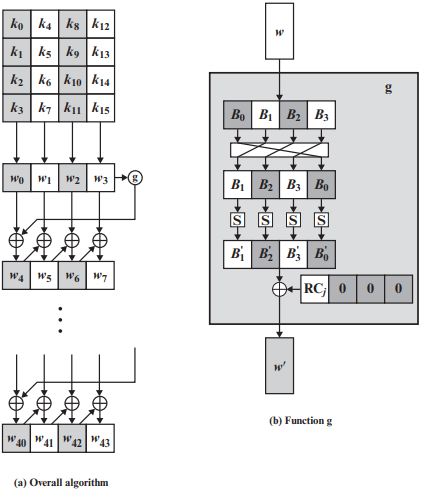

<font color="red" size="4">Question 7:</font> [7.5 mark]

Before we implement the key expansion, we need the core function to compute the next round key.
Recall that each round key is computed from the last round key. Finish the 'compute_next_rk' below:

(Hint: Round Constant (RC) has already been defined in Section 0 as 'RCON')

In [60]:
## Input: 1-D byte array for the last round key
## Input: int for the round of computed round key
##        (say we are computing rk1, then we invoke this function as compute_next_rk(rk0, 1))
## Output: 1-D byte array for the next round key

def compute_next_rk(current_rk, computed_round):
    rk_matrix = to_matrix(current_rk)

    last_col = [rk_matrix[row][3] for row in range(4)] # Take last column of current round key

    rotated = last_col[1:] + last_col[:1] # Rotate left

    substituted = [SBOX[b >> 4][b & 0x0F] for b in rotated] # Apply S-box substitution

    substituted[0] ^= RCON[computed_round] # XOR with RCON

    # Generate new first column
    for row in range(4):
        rk_matrix[row][0] ^= substituted[row]

    # Generate next columns
    for col in range(1, 4):
        for row in range(4):
            rk_matrix[row][col] ^= rk_matrix[row][col - 1]

    next_rk = to_array(rk_matrix)
    return next_rk




<font color="red" size="4">Question 8:</font> [2.5 mark]

Now finish the entire key expanison for AES 128. The input is the master key represented as an 1-D byte array. The entire expanded key is a 2-D byte array list, where each row is a round key represented as an 1-D byte array.

In [61]:
## Input: 1-D byte array for the master key
## Output: 2-D byte array list for the entire expanded key
def AES128_key_expansion(master_key):
    expanded_key = []
    ### Your code starts ###
    expanded_key.append(master_key)
    for i in range(1, 11):
        expanded_key.append(compute_next_rk(expanded_key[-1], i))
     ### Your code ends ###

    return expanded_key


In [62]:
## For your check
test_master_key = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
expanded_key = AES128_key_expansion(test_master_key)
for round_key in expanded_key:
    assert len(round_key) == 16

---------------------------------------------------------

## Section 2: AES-128 Encryption and Decryption for one block
#### [20 marks]


<font color="red" size="4">Question 9:</font> [10 mark]

Finish the encryption operation. The function take the 1-D byte array master-key and one block 1-D byte array plaintext as inputs, and output the corresponding 1-D byte array ciphertext.

In [63]:
## Input: 1-D byte array for the master key
## Input: 1-D byte array for one block of plaintext
## Output: 1-D byte array for the ciphertext
def AES128_encrypt(master_key, plaintext):
    # Key expansion to generate all 11 round keys
    round_keys = [master_key]
    for r in range(1, 11):
        next_rk = compute_next_rk(round_keys[-1], r)
        round_keys.append(next_rk)

    # Initial state
    state = to_matrix(plaintext)

    # Initial AddRoundKey
    state = AddRoundKey(state, to_matrix(round_keys[0]))

    # 9 main rounds
    for r in range(1, 10):
        state = SubBytes(state)
        state = ShiftRows(state)
        state = MixColumns(state)
        state = AddRoundKey(state, to_matrix(round_keys[r]))

    # Final round (no MixColumns)
    state = SubBytes(state)
    state = ShiftRows(state)
    state = AddRoundKey(state, to_matrix(round_keys[10]))

    # Convert state to ciphertext array
    ciphertext = to_array(state)
    return ciphertext



<font color="red" size="4">Question 10:</font> [10 mark]

Finish the decryption operation. The function take the 1-D byte array master-key and one block 1-D byte array ciphertext as inputs, and output the corresponding 1-D byte array plaintext.

In [64]:
## Input: 1-D byte array for the master key
## Input: 1-D byte array for one block of ciphertext
## Output: 1-D byte array for the plaintext
def AES128_decrypt(master_key, ciphertext):
    # Key expansion to generate all 11 round keys
    round_keys = [master_key]
    for r in range(1, 11):
        next_rk = compute_next_rk(round_keys[-1], r)
        round_keys.append(next_rk)

    # Initial state
    state = to_matrix(ciphertext)

    # Initial AddRoundKey (last round key)
    state = AddRoundKey(state, to_matrix(round_keys[10]))

    # 9 inverse rounds
    for r in range(9, 0, -1):
        state = ShiftRows_inv(state)
        state = SubBytes_inv(state)
        state = AddRoundKey(state, to_matrix(round_keys[r]))
        state = MixColumns_inv(state)

    # Final inverse round (no MixColumns_inv)
    state = ShiftRows_inv(state)
    state = SubBytes_inv(state)
    state = AddRoundKey(state, to_matrix(round_keys[0]))

    # Convert state to plaintext array
    plaintext = to_array(state)
    return plaintext


---------------------------------------------------------

## Section 3: AES-128 with Block-Cipher Mode
#### [20 marks]

To encrypt/decrypt long messages, AES should be integrated with block-cipher modes such as CBC, CTR. Futhermore, the length of real-world plaintexts does not always be the exact multiplies of AES block size. As a result, we need pad and unpad our plaintext before encryption/after decryption.

For simplicity, we consider the minimum unit for a plaintext element is <b>byte</b> in this assignment. In other words, we assume the plaintext is always a sequence of bytes, but not 19 bits/22 bits etc.

Following our assumption, we pad/unpad the plaintext at <b>byte level</b> for our AES-CBC implementation. It follows:
<li> pad: If the last block matches the AES-128 block size already, do nothing. Else, pad the last block with '0x00' until it fullfill the block.</li>
<li> unpad: Start from the last byte, remove all continuous '0x00' until a none-zero byte comes.</li>

<font color="red" size="4">Question 11:</font> [20 mark]

We have provided the pad and unpad implementation below. Make use of them to finish the implementation for AES128_CBC_encrypt and AES128_CBC_decrypt. Both of the encryption and decrytion take an 1-D byte array IV, an 1-D byte array master key, and an 1-D byte array plaintext/ciphertext. The output is the corresponding 1-D byte array ciphertext/plaintext.

In [65]:
## Input: 1-D byte array for the plaintext
## Output: 1-D byte array for the padded plaintext
def pad(plaintext):
    pad_elm = 0x00
    if len(plaintext) % 16 == 0:
        pad_len = 0
    else:
        pad_len = 16 - len(plaintext) % 16
    padded_plaintext = plaintext + [pad_elm] * pad_len
    return padded_plaintext

## Input: 1-D byte array for the padded plaintext
## Output: 1-D byte array for the unpadded plaintext
def unpad(padded_plaintext):
    pad_elm = 0x00
    for i in range(len(padded_plaintext)-1, -1, -1):
        if padded_plaintext[i] != pad_elm:
            break
    unpadded_plaintext = padded_plaintext[:i+1]
    return unpadded_plaintext

In [66]:
## Input: 1-D byte array for the IV (Assume the IV is always 16 bytes)
## Input: 1-D byte array for the master key
## Input: 1-D byte array for the plaintext
## Output: 1-D byte array for the ciphertext
def AES128_CBC_encrypt(iv, master_key, plaintext):
    padded_plaintext = pad(plaintext)
    ciphertext = []
    prev_block = iv

    for i in range(0, len(padded_plaintext), 16):
        block = padded_plaintext[i:i+16]
        # XOR with previous ciphertext (or IV for first block)
        xor_block = [block[j] ^ prev_block[j] for j in range(16)]
        encrypted_block = AES128_encrypt(master_key, xor_block)
        ciphertext.extend(encrypted_block)
        prev_block = encrypted_block

    return ciphertext

## Input: 1-D byte array for the IV (Assume the IV is always 16 bytes)
## Input: 1-D byte array for the master key
## Input: 1-D byte array for the ciphertext
## Output: 1-D byte array for the plaintext
def AES128_CBC_decrypt(iv, master_key, ciphertext):
    plaintext = []
    prev_block = iv

    for i in range(0, len(ciphertext), 16):
        block = ciphertext[i:i+16]
        decrypted_block = AES128_decrypt(master_key, block)
        xor_block = [decrypted_block[j] ^ prev_block[j] for j in range(16)]
        plaintext.extend(xor_block)
        prev_block = block

    unpadded_plaintext = unpad(plaintext)
    return unpadded_plaintext


In [67]:
## For your check
test_plaintext = [0xff] * 22
test_master_key = [0x01, 0x02, 0x03, 0x04, 0x05, 0x06, 0x07, 0x08, 0x09, 0x0A, 0x0B, 0x0C, 0x0D, 0x0E, 0x0F, 0x10]
iv = [0x00] * 16
ciphertext = AES128_CBC_encrypt(iv, test_master_key, test_plaintext)
decrypted_plaintext = AES128_CBC_decrypt(iv, test_master_key, ciphertext)
assert len(ciphertext) == 32
assert len(decrypted_plaintext) == len(unpad(test_plaintext))

---------------------------------------------------------

## Section 4: Discussions
#### [40 marks]

Please answer following questions.

<font color="red" size="4">Question 12:</font> [10 mark]

A full AES round in AES-128 encryption can be concluded as a sequence of Substitute Bytes, Shift Rows, Mix Columns, and Add Round Key.
However, AES-128 encryption starts with an individual Add Round Key before the first round starts. Explain why such an Add Round Key operation is needed before the first round starts. Or in other words, explain why AES-128 encryption does not start with a full round including all four operations directly.

**Answer:**

The $\texttt{AddRoundKey}$ operation, which is a simple bitwise XOR of the current state with a round key, is the primary source of confusion in AES. By introducing the secret key at the very outset, the state of the data is immediately made dependent on the key. It is a deliberate measure to immediately obscure the plaintext and prevent an entire round from being effectively neutralized.

For understanding the necessity of the $\texttt{AddRoundKey}$ operation, consider a hypothetical scenario where AES-128 begins directly with a full round. In this case, the $\texttt{SubBytes}$, $\texttt{ShiftRows}$, and $\texttt{MixColumns}$ operations would be performed on the raw, unaltered plaintext.

In this case, all the transformations within an AES round, are deterministic and publicly known. An attacker, particularly in a known-plaintext attack scenario where they have access to both the plaintext and the corresponding ciphertext, would know the exact input to the first round's $\texttt{SubBytes}$, $\texttt{ShiftRows}$, and $\texttt{MixColumns}$ operations. This would allow them to observe the output of these transformations on a known block of data.



<font color="red" size="4">Question 13:</font> [10 mark]

What is the problem for the padding strategy we used in our AES-CBC? Describe it, and describe a solution at the situation where only the ciphertext and its random IV can be transmitted between two parties.

Note that we assume the minumum message unit is <b>byte</b>.

**Answer:**

The current padding strategy uses $\texttt{0x00}$ bytes and removes trailing zeroes in $\texttt{unpad()}$ by stripping all $\texttt{0x00}$ values at the end. This creates ambiguity when the original message ends in one or more $\texttt{0x00}$ bytes, making the decryption incorrect.

Now for a solution to the situation, we can do this: Append the number of valid bytes in the last block as the final byte of the message.



Method:

* Pad with zeros to complete the last 16-byte block.

* Add one extra 16-byte block where the last byte indicates how many bytes in the previous block are valid.

Example:

* Plaintext = $\texttt{[0x41, 0x42, 0x43]}$ (3 bytes)

* Pad to 16 bytes = $\texttt{[0x41, 0x42, 0x43, 0x00, ..., 0x00]}$

* Final block = $\texttt{[0x00, ..., 0x00, 0x03]}$

Total = 32 bytes

Unpadding:

* Decrypt final block, read last byte $n$, keep only first $n$ bytes from previous block.

This scheme has no ambiguity, is deterministic, and requires no reserved byte values in plaintext.

<font color="red" size="4">Question 14:</font> [20 mark]

Consider an alternative usage of AES-CBC-encryption. Assume the IV is always fixed as '0x00'. Then, for arbitrary plaintext $m$, Alice use the ciphertext of the last encryption block as the unique $Tag$ for $m$. Assume an adversary can continuous query $Tag_i$ for arbitrary $m_i$ from Alice. With this power, can the adversary generate a valid $Tag_f$ for a message $m_f$ without querying it from Alice? If yes, describe the process to compute $Tag_f$. If no, describe how AES-CBC-encryption prevents such a tag forge.

**Answer:**

Yes, the adversary can forge a valid $Tag_f$ for some chosen message $m_f$ without querying it from Alice, since CBC‑MAC with a fixed zero IV and no length‐binding is insecure for variable‑length messages. Here is one possible way:



We can suppose the CBC encryption of message blocks $m_1, ..., m_n$ with key K and IV = $\texttt{0x00}$, as:

* $c_0 = \texttt{0x00}$

* $c_1 = AES_K(m_1 \oplus c_0)$

* $c_2 = AES_K(m_2 \oplus c_1)$

* $\dots$

* $c_n = AES_K(m_n \oplus c_{n-1})$

So for a message $m = m_1 || ... || m_n$, the tag is $Tag_m = c_n$.


Now for forging, the adversary queries Alice as follows:

* $Tag_1 = AES_K(m_1)$ $\leftarrow$ where $m_1$ is a 1-block message

* $Tag_2 = AES_K(m_2 \oplus Tag_1)$ $\leftarrow$ this is the second block if $m = m_1 || m_2$

and so on.

Then, the adversary can build a new message $m_f = m_1 || m_2'$ such that:

$m_2' = m_2 \oplus Tag_1$

So:

$c_1 = AES_K(m_1 \oplus \texttt{0x00}) = Tag_1$

$c_2 = AES_K(m_2' \oplus c_1) = AES_K((m_2 \oplus Tag_1) \oplus Tag_1) = AES_K(m_2) = Tag_2$

Thus, $Tag_f = Tag_2$, the correct tag for $m_f = m_1 || m_2'$. Therefore, the adversary obtains a valid tag for the message $m$ without ever asking Alice for it.

--------------------------------------------

End of this Assignment